In [1]:
import tensorflow as tf

In [2]:
print('tf{}'.format(tf.__version__))

tf2.8.0


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
(train_image, train_label),(test_image, test_label) = tf.keras.datasets.fashion_mnist.load_data()

In [5]:
train_image.shape,train_label.shape,test_image.shape,test_label.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [6]:
train_image = train_image/255
test_image = test_image/255

In [7]:
train_label

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [21]:
train_label_onehot = tf.keras.utils.to_categorical(train_label)
test_label_onehot = tf.keras.utils.to_categorical(test_label)

In [9]:
train_label_onehot[0],test_label_onehot

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 1., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32))

In [10]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax')) # output1

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = model.fit(train_image,train_label_onehot,epochs=5,validation_data = (test_image, test_label_onehot))

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2780 - acc: 0.8957 - val_loss: 0.3415 - val_acc: 0.8779
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2625 - acc: 0.9012 - val_loss: 0.3512 - val_acc: 0.8757
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2542 - acc: 0.9063 - val_loss: 0.3435 - val_acc: 0.8772
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2441 - acc: 0.9072 - val_loss: 0.3541 - val_acc: 0.8746
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2346 - acc: 0.9112 - val_loss: 0.3431 - val_acc: 0.8841


history.history.keys()

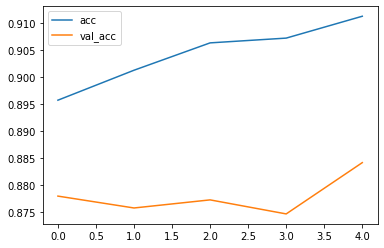

In [17]:
plt.plot(history.epoch,history.history.get('acc'),label='acc')
plt.plot(history.epoch,history.history.get('val_acc'),label='val_acc')
plt.legend()

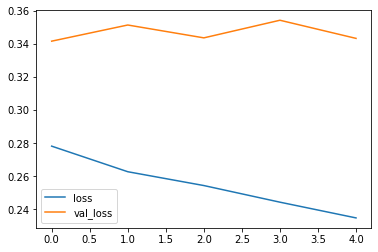

In [18]:
plt.plot(history.epoch,history.history.get('loss'),label='loss')
plt.plot(history.epoch,history.history.get('val_loss'),label='val_loss')
plt.legend()

In [19]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax')) # output1

In [23]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy', # diff
              metrics=['acc']
)

In [24]:
history = model.fit(train_image,train_label_onehot,epochs=5,validation_data = (test_image, test_label_onehot))

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7553 - acc: 0.7213 - val_loss: 0.4963 - val_acc: 0.8154
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5585 - acc: 0.7996 - val_loss: 0.4553 - val_acc: 0.8365
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5137 - acc: 0.8156 - val_loss: 0.4308 - val_acc: 0.8448
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4892 - acc: 0.8239 - val_loss: 0.4162 - val_acc: 0.8493
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4719 - acc: 0.8311 - val_loss: 0.4160 - val_acc: 0.8478


In [25]:
history.history.keys()


dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

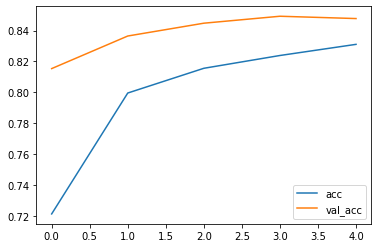

In [26]:
plt.plot(history.epoch,history.history.get('acc'),label='acc')
plt.plot(history.epoch,history.history.get('val_acc'),label='val_acc')
plt.legend()

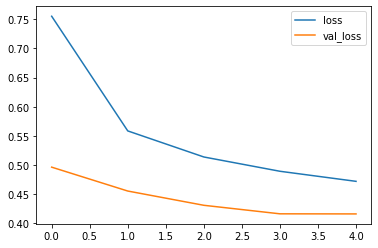

In [27]:
plt.plot(history.epoch,history.history.get('loss'),label='loss')
plt.plot(history.epoch,history.history.get('val_loss'),label='val_loss')
plt.legend()

In [28]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax')) # output1

In [29]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy', # diff
              metrics=['acc']
)

In [30]:
history = model.fit(train_image,train_label_onehot,epochs=5,validation_data = (test_image, test_label_onehot))

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5500 - acc: 0.8097 - val_loss: 0.4909 - val_acc: 0.8267
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4150 - acc: 0.8542 - val_loss: 0.4144 - val_acc: 0.8538
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3798 - acc: 0.8641 - val_loss: 0.4238 - val_acc: 0.8455
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3565 - acc: 0.8720 - val_loss: 0.3953 - val_acc: 0.8602
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3403 - acc: 0.8777 - val_loss: 0.3784 - val_acc: 0.8675


In [31]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

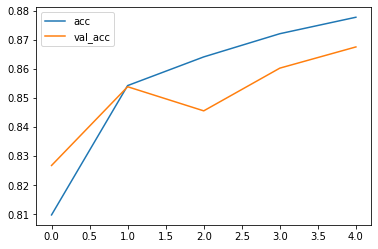

In [32]:
plt.plot(history.epoch,history.history.get('acc'),label='acc')
plt.plot(history.epoch,history.history.get('val_acc'),label='val_acc')
plt.legend()